# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [236]:
# Import your libraries:

%matplotlib inline

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import RobustScaler

In this lab, we will explore a dataset that describes websites with different features and labels them either benign or malicious . We will use supervised learning algorithms to figure out what feature patterns malicious websites are likely to have and use our model to predict malicious websites.

# Challenge 1 - Explore The Dataset

Let's start by exploring the dataset. First load the data file:

In [51]:
websites = pd.read_csv('../data/website.csv')

#### Explore the data from an bird's-eye view.

You should already been very familiar with the procedures now so we won't provide the instructions step by step. Reflect on what you did in the previous labs and explore the dataset.

Things you'll be looking for:

* What the dataset looks like?
* What are the data types?
* Which columns contain the features of the websites?
* Which column contains the feature we will predict? What is the code standing for benign vs malicious websites?
* Do we need to transform any of the columns from categorical to ordinal values? If so what are these columns?

Feel free to add additional cells for your explorations. Make sure to comment what you find out.

In [52]:
# Your code here
# Display the first few rows of the dataset
display(websites.head())

# Check the basic information about the dataset
display(websites.info())

# Check the summary statistics
display(websites.describe())

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,...,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,16,7,iso-8859-1,nginx,263.0,NaN,NaN,10/10/2015 18:21,NaN,...,0,2,700,9,10,1153,832,9,2.0,1
1,B0_2314,16,6,UTF-8,Apache/2.4.10,15087.0,NaN,NaN,NaN,NaN,...,7,4,1230,17,19,1265,1230,17,0.0,0
2,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0.0,0
3,B0_113,17,6,ISO-8859-1,nginx,162.0,US,AK,7/10/1997 4:00,12/09/2013 0:45,...,22,3,3812,39,37,18784,4380,39,8.0,0
4,B0_403,17,6,UTF-8,NaN,124140.0,US,TX,12/05/1996 0:00,11/04/2017 0:00,...,2,5,4278,61,62,129889,4586,61,4.0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   URL                        1781 non-null   object 
 1   URL_LENGTH                 1781 non-null   int64  
 2   NUMBER_SPECIAL_CHARACTERS  1781 non-null   int64  
 3   CHARSET                    1774 non-null   object 
 4   SERVER                     1605 non-null   object 
 5   CONTENT_LENGTH             969 non-null    float64
 6   WHOIS_COUNTRY              1475 non-null   object 
 7   WHOIS_STATEPRO             1419 non-null   object 
 8   WHOIS_REGDATE              1654 non-null   object 
 9   WHOIS_UPDATED_DATE         1642 non-null   object 
 10  TCP_CONVERSATION_EXCHANGE  1781 non-null   int64  
 11  DIST_REMOTE_TCP_PORT       1781 non-null   int64  
 12  REMOTE_IPS                 1781 non-null   int64  
 13  APP_BYTES                  1781 non-null   int64

None

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CONTENT_LENGTH,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
count,1781.000000,1781.000000,969.000000,1781.000000,1781.000000,1781.000000,1.781000e+03,1781.000000,1781.000000,1.781000e+03,1.781000e+03,1781.000000,1780.000000,1781.000000
mean,56.961258,11.111735,11726.927761,16.261089,5.472768,3.060640,2.982339e+03,18.540146,18.746210,1.589255e+04,3.155599e+03,18.540146,2.263483,0.121280
std,27.555586,4.549896,36391.809051,40.500975,21.807327,3.386975,5.605057e+04,41.627173,46.397969,6.986193e+04,5.605378e+04,41.627173,2.930853,0.326544
min,16.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,39.000000,8.000000,324.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
50%,49.000000,10.000000,1853.000000,7.000000,0.000000,2.000000,6.720000e+02,8.000000,9.000000,5.790000e+02,7.350000e+02,8.000000,0.000000,0.000000
75%,68.000000,13.000000,11323.000000,22.000000,5.000000,5.000000,2.328000e+03,26.000000,25.000000,9.806000e+03,2.701000e+03,26.000000,4.000000,0.000000
max,249.000000,43.000000,649263.000000,1194.000000,708.000000,17.000000,2.362906e+06,1198.000000,1284.000000,2.060012e+06,2.362906e+06,1198.000000,20.000000,1.000000


In [53]:
# Display column names
print("Column Names:", websites.columns)

print('\n')

# Explore unique values in each column
for column in websites.columns:
    unique_values = websites[column].unique()
    print(f"Unique values in {column}: {unique_values[:5]}")  # Display only the first 5 unique values

print('\n')
# Check data types of each column
print("Data Types:", websites.dtypes)

Column Names: Index(['URL', 'URL_LENGTH', 'NUMBER_SPECIAL_CHARACTERS', 'CHARSET', 'SERVER',
       'CONTENT_LENGTH', 'WHOIS_COUNTRY', 'WHOIS_STATEPRO', 'WHOIS_REGDATE',
       'WHOIS_UPDATED_DATE', 'TCP_CONVERSATION_EXCHANGE',
       'DIST_REMOTE_TCP_PORT', 'REMOTE_IPS', 'APP_BYTES', 'SOURCE_APP_PACKETS',
       'REMOTE_APP_PACKETS', 'SOURCE_APP_BYTES', 'REMOTE_APP_BYTES',
       'APP_PACKETS', 'DNS_QUERY_TIMES', 'Type'],
      dtype='object')


Unique values in URL: ['M0_109' 'B0_2314' 'B0_911' 'B0_113' 'B0_403']
Unique values in URL_LENGTH: [16 17 18 19 20]
Unique values in NUMBER_SPECIAL_CHARACTERS: [7 6 5 8 9]
Unique values in CHARSET: ['iso-8859-1' 'UTF-8' 'us-ascii' 'ISO-8859-1' 'utf-8']
Unique values in SERVER: ['nginx' 'Apache/2.4.10' 'Microsoft-HTTPAPI/2.0' nan 'Apache/2']
Unique values in CONTENT_LENGTH: [   263.  15087.    324.    162. 124140.]
Unique values in WHOIS_COUNTRY: [nan 'US' 'SC' 'GB' 'UK']
Unique values in WHOIS_STATEPRO: [nan 'AK' 'TX' 'Mahe' 'CO']
Unique values

In [54]:
websites.isnull().sum()

URL                            0
URL_LENGTH                     0
NUMBER_SPECIAL_CHARACTERS      0
CHARSET                        7
SERVER                       176
CONTENT_LENGTH               812
WHOIS_COUNTRY                306
WHOIS_STATEPRO               362
WHOIS_REGDATE                127
WHOIS_UPDATED_DATE           139
TCP_CONVERSATION_EXCHANGE      0
DIST_REMOTE_TCP_PORT           0
REMOTE_IPS                     0
APP_BYTES                      0
SOURCE_APP_PACKETS             0
REMOTE_APP_PACKETS             0
SOURCE_APP_BYTES               0
REMOTE_APP_BYTES               0
APP_PACKETS                    0
DNS_QUERY_TIMES                1
Type                           0
dtype: int64

In [55]:
# Replace 'target_column_name' with the actual column name for the target variable
target_column = 'Type'

# Display unique values in the target column
unique_values = websites[target_column].unique()
print(f"Unique values in {target_column}: {unique_values}")

# Count the occurrences of each unique value in the target column
value_counts = websites[target_column].value_counts()
print(f"Value counts in {target_column}:\n{value_counts}")

# Assume 0 represents benign and 1 represents malicious (replace with actual mapping)
print("Code Mapping:")
print("0: Benign")
print("1: Malicious")

Unique values in Type: [1 0]
Value counts in Type:
Type
0    1565
1     216
Name: count, dtype: int64
Code Mapping:
0: Benign
1: Malicious


In [56]:
# Select columns of type 'object'
categorical_columns = websites.select_dtypes(include=['object']).columns
print("Categorical Columns:", categorical_columns)

Categorical Columns: Index(['URL', 'CHARSET', 'SERVER', 'WHOIS_COUNTRY', 'WHOIS_STATEPRO',
       'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE'],
      dtype='object')


In [57]:
#JUST wanted to confirm with this float type columns, because sometimes it's possible that float type is categorical
#  If the float values are used to encode categories or labels in a specific way, 
float_columns = ['CONTENT_LENGTH', 'DNS_QUERY_TIMES']

for column in float_columns:
    unique_values = websites[column].unique()
    print(f"Unique values in {column}: {unique_values}")

Unique values in CONTENT_LENGTH: [2.63000e+02 1.50870e+04 3.24000e+02 1.62000e+02 1.24140e+05         nan
 3.45000e+02 1.37160e+04 3.69200e+03 1.30540e+04 9.57000e+02 6.86000e+02
 1.50250e+04 3.18000e+02 2.24000e+02 4.42100e+03 4.41000e+02 6.67100e+03
 4.34000e+02 1.30010e+04 3.25700e+03 6.74800e+03 2.40000e+02 3.98500e+03
 6.17300e+03 3.19000e+02 3.40000e+01 1.77800e+03 7.56000e+02 1.48390e+04
 6.58000e+02 1.95000e+02 4.16600e+03 9.62000e+02 2.68800e+03 1.99000e+02
 3.54800e+03 0.00000e+00 5.42600e+03 8.75600e+03 1.93000e+02 7.96700e+03
 1.15060e+04 3.90360e+04 8.57800e+03 1.05760e+04 1.28460e+04 6.66600e+03
 4.45000e+02 1.84380e+04 7.31400e+03 9.13600e+03 5.01900e+03 2.10000e+02
 8.65400e+03 2.38000e+02 2.68560e+04 1.02100e+04 1.36840e+04 7.70000e+02
 6.81300e+03 2.04040e+04 7.15900e+03 3.88000e+02 1.77000e+02 1.47030e+04
 8.75100e+03 3.50000e+02 6.04000e+02 2.87000e+02 6.58150e+04 4.07500e+03
 5.13200e+03 2.20040e+04 6.43000e+02 6.37000e+02 4.20762e+05 1.39900e+03
 3.28000e+02 3.340

In [58]:
 #categorical columns
categorical_columns = ['URL', 'CHARSET', 'SERVER', 'WHOIS_COUNTRY', 'WHOIS_STATEPRO',
       'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE']

for column in categorical_columns:
    unique_values = websites[column].unique()
    print(f"Unique values in {column}: {unique_values}")

Unique values in URL: ['M0_109' 'B0_2314' 'B0_911' ... 'B0_162' 'B0_1152' 'B0_676']
Unique values in CHARSET: ['iso-8859-1' 'UTF-8' 'us-ascii' 'ISO-8859-1' 'utf-8' nan 'windows-1251'
 'ISO-8859' 'windows-1252']
Unique values in SERVER: ['nginx' 'Apache/2.4.10' 'Microsoft-HTTPAPI/2.0' nan 'Apache/2'
 'nginx/1.10.1' 'Apache' 'Apache/2.2.15 (Red Hat)'
 'Apache/2.4.23 (Unix) OpenSSL/1.0.1e-fips mod_bwlimited/1.4'
 'openresty/1.11.2.1' 'Apache/2.2.22' 'Apache/2.4.7 (Ubuntu)'
 'nginx/1.12.0'
 'Apache/2.4.12 (Unix) OpenSSL/1.0.1e-fips mod_bwlimited/1.4'
 'Oracle-iPlanet-Web-Server/7.0' 'cloudflare-nginx' 'nginx/1.6.2'
 'openresty' 'Heptu web server' 'Pepyaka/1.11.3' 'nginx/1.8.0'
 'nginx/1.10.1 + Phusion Passenger 5.0.30' 'Apache/2.2.29 (Amazon)'
 'Microsoft-IIS/7.5' 'LiteSpeed'
 'Apache/2.4.25 (cPanel) OpenSSL/1.0.1e-fips mod_bwlimited/1.4' 'tsa_c'
 'Apache/2.2.0 (Fedora)' 'Apache/2.2.22 (Debian)' 'Apache/2.2.15 (CentOS)'
 'Apache/2.4.25' 'Apache/2.4.25 (Amazon) PHP/7.0.14' 'GSE'
 'Apache/2.

In [59]:
# List of potential categorical columns
categorical_columns = ['CHARSET', 'URL', 'SERVER', 'WHOIS_COUNTRY', 'WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE']

# Create a copy of the DataFrame to avoid modifying the original
websites_encoded = websites.copy()

# Initialize the OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

# Fit and transform all categorical columns at once
websites_encoded[categorical_columns] = ordinal_encoder.fit_transform(websites[categorical_columns].fillna('NA'))

# Display the modified DataFrame
print(websites_encoded.head())

      URL  URL_LENGTH  NUMBER_SPECIAL_CHARACTERS  CHARSET  SERVER  \
0  1574.0          16                          7      4.0   200.0   
1   796.0          16                          6      3.0    61.0   
2  1479.0          16                          6      5.0   115.0   
3   132.0          17                          6      1.0   200.0   
4   982.0          17                          6      3.0   123.0   

   CONTENT_LENGTH  WHOIS_COUNTRY  WHOIS_STATEPRO  WHOIS_REGDATE  \
0           263.0           27.0            81.0           59.0   
1         15087.0           27.0            81.0          889.0   
2           324.0           27.0            81.0          889.0   
3           162.0           42.0             4.0          806.0   
4        124140.0           42.0           137.0           93.0   

   WHOIS_UPDATED_DATE  ...  DIST_REMOTE_TCP_PORT  REMOTE_IPS  APP_BYTES  \
0               593.0  ...                     0           2        700   
1               593.0  ...      

In [60]:
websites_encoded.isnull().sum()

URL                            0
URL_LENGTH                     0
NUMBER_SPECIAL_CHARACTERS      0
CHARSET                        0
SERVER                         0
CONTENT_LENGTH               812
WHOIS_COUNTRY                  0
WHOIS_STATEPRO                 0
WHOIS_REGDATE                  0
WHOIS_UPDATED_DATE             0
TCP_CONVERSATION_EXCHANGE      0
DIST_REMOTE_TCP_PORT           0
REMOTE_IPS                     0
APP_BYTES                      0
SOURCE_APP_PACKETS             0
REMOTE_APP_PACKETS             0
SOURCE_APP_BYTES               0
REMOTE_APP_BYTES               0
APP_PACKETS                    0
DNS_QUERY_TIMES                1
Type                           0
dtype: int64

In [61]:
#Since i still have null values, though in numerial columns
websites_encoded_imputed = websites_encoded.copy()

# Initialize the SimpleImputer with strategy='mean'
imputer = SimpleImputer(strategy='mean')

# Impute missing values in 'CONTENT_LENGTH' and 'DNS_QUERY_TIMES'
websites_encoded_imputed[['CONTENT_LENGTH', 'DNS_QUERY_TIMES']] = imputer.fit_transform(websites_encoded[['CONTENT_LENGTH', 'DNS_QUERY_TIMES']])

# Check for any remaining missing values
missing_values_after_imputation = websites_encoded_imputed.isnull().sum()


print(websites_encoded_imputed.head())
print("\nMissing Values After Imputation:")
print(missing_values_after_imputation)

      URL  URL_LENGTH  NUMBER_SPECIAL_CHARACTERS  CHARSET  SERVER  \
0  1574.0          16                          7      4.0   200.0   
1   796.0          16                          6      3.0    61.0   
2  1479.0          16                          6      5.0   115.0   
3   132.0          17                          6      1.0   200.0   
4   982.0          17                          6      3.0   123.0   

   CONTENT_LENGTH  WHOIS_COUNTRY  WHOIS_STATEPRO  WHOIS_REGDATE  \
0           263.0           27.0            81.0           59.0   
1         15087.0           27.0            81.0          889.0   
2           324.0           27.0            81.0          889.0   
3           162.0           42.0             4.0          806.0   
4        124140.0           42.0           137.0           93.0   

   WHOIS_UPDATED_DATE  ...  DIST_REMOTE_TCP_PORT  REMOTE_IPS  APP_BYTES  \
0               593.0  ...                     0           2        700   
1               593.0  ...      

In [62]:
websites_encoded_imputed.isnull().sum()

URL                          0
URL_LENGTH                   0
NUMBER_SPECIAL_CHARACTERS    0
CHARSET                      0
SERVER                       0
CONTENT_LENGTH               0
WHOIS_COUNTRY                0
WHOIS_STATEPRO               0
WHOIS_REGDATE                0
WHOIS_UPDATED_DATE           0
TCP_CONVERSATION_EXCHANGE    0
DIST_REMOTE_TCP_PORT         0
REMOTE_IPS                   0
APP_BYTES                    0
SOURCE_APP_PACKETS           0
REMOTE_APP_PACKETS           0
SOURCE_APP_BYTES             0
REMOTE_APP_BYTES             0
APP_PACKETS                  0
DNS_QUERY_TIMES              0
Type                         0
dtype: int64

In [63]:
""" 
Explored the dataset to understand its structure, data types, and unique values. Identified potential categorical columns for encoding.
Confirmed the target variable ('Type') and its code mapping (0 for benign, 1 for malicious).

Prepared the dataset for further analysis and modelling. Cleaned the data, Used OrdinalEncoder to transform categorical columns into numerical representations.
Imputed missing values in numerical columns ('CONTENT_LENGTH' and 'DNS_QUERY_TIMES') using the mean strategy. Thereby, after encoding and imputation,
the dataset is free of missing values.

The dataset is now ready for training supervised learning models.
Algorithms can be applied to learn patterns in the features that distinguish benign from malicious websites.

"""

" \nExplored the dataset to understand its structure, data types, and unique values. Identified potential categorical columns for encoding.\nConfirmed the target variable ('Type') and its code mapping (0 for benign, 1 for malicious).\n\nPrepared the dataset for further analysis and modelling. Cleaned the data, Used OrdinalEncoder to transform categorical columns into numerical representations.\nImputed missing values in numerical columns ('CONTENT_LENGTH' and 'DNS_QUERY_TIMES') using the mean strategy. Thereby, after encoding and imputation,\nthe dataset is free of missing values.\n\nThe dataset is now ready for training supervised learning models.\nAlgorithms can be applied to learn patterns in the features that distinguish benign from malicious websites.\n\n"

In [64]:
# Your comment here

#### Next, evaluate if the columns in this dataset are strongly correlated.

If our dataset has strongly correlated columns, we need to choose certain ML algorithms instead of others. We need to evaluate this for our dataset now.

Luckily, most of the columns in this dataset are ordinal which makes things a lot easier for us. In the next cells below, evaluate the level of collinearity of the data.

We provide some general directions for you to consult in order to complete this step:

1. You will create a correlation matrix using the numeric columns in the dataset.

1. Create a heatmap using `seaborn` to visualize which columns have high collinearity.

1. Comment on which columns you might need to remove due to high collinearity.

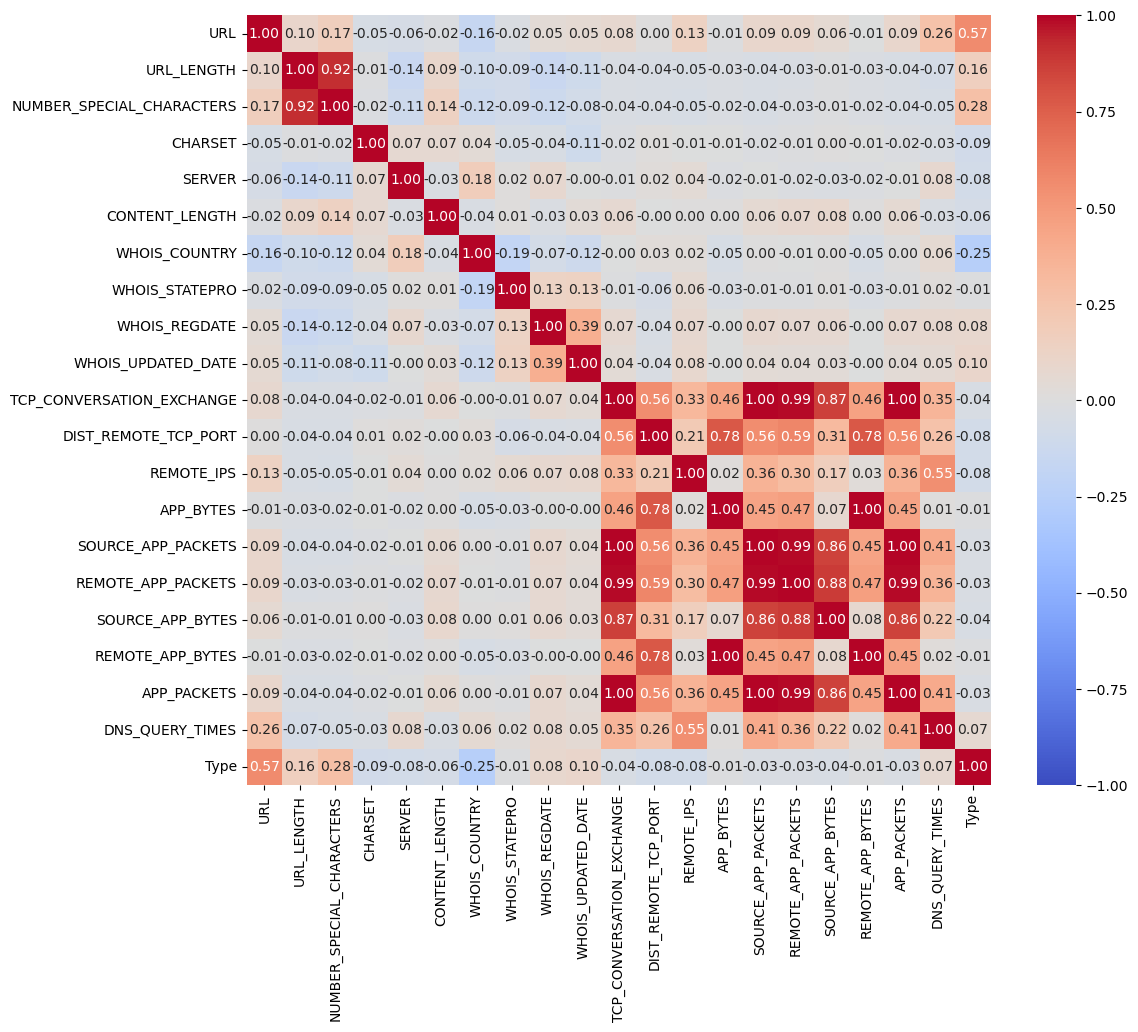

In [65]:
# Your code here
# Create a correlation matrix using the numeric columns
correlation_matrix = websites_encoded_imputed.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Create a heatmap using seaborn to visualize collinearity
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f", vmin=-1, vmax=1,)

# Show the plot
plt.show()

In [66]:
correlation_matrix

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,...,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
URL,1.000000,0.101426,0.169416,-0.052872,-0.055562,-0.018824,-0.158980,-0.024876,0.046035,0.054848,...,0.000903,0.134502,-0.008522,0.093702,0.086015,0.058756,-0.007476,0.093702,0.262914,0.565433
URL_LENGTH,0.101426,1.000000,0.917986,-0.009327,-0.143401,0.088854,-0.101278,-0.086517,-0.144464,-0.105561,...,-0.039839,-0.046367,-0.026446,-0.042264,-0.033779,-0.014857,-0.026686,-0.042264,-0.068533,0.162104
NUMBER_SPECIAL_CHARACTERS,0.169416,0.917986,1.000000,-0.019580,-0.114579,0.143130,-0.121783,-0.086024,-0.121966,-0.079151,...,-0.042619,-0.047103,-0.023914,-0.040096,-0.030597,-0.014376,-0.024098,-0.040096,-0.050038,0.280897
CHARSET,-0.052872,-0.009327,-0.019580,1.000000,0.067897,0.065868,0.043502,-0.048211,-0.039455,-0.105861,...,0.012855,-0.005969,-0.007371,-0.018928,-0.011418,0.003521,-0.007514,-0.018928,-0.032578,-0.090948
SERVER,-0.055562,-0.143401,-0.114579,0.067897,1.000000,-0.031028,0.179437,0.015150,0.071488,-0.004697,...,0.022290,0.039458,-0.020804,-0.007134,-0.018096,-0.026517,-0.020522,-0.007134,0.075456,-0.081943
CONTENT_LENGTH,-0.018824,0.088854,0.143130,0.065868,-0.031028,1.000000,-0.038822,0.012442,-0.026931,0.034419,...,-0.000089,0.003500,0.002642,0.060455,0.072362,0.083833,0.002514,0.060455,-0.032391,-0.064073
WHOIS_COUNTRY,-0.158980,-0.101278,-0.121783,0.043502,0.179437,-0.038822,1.000000,-0.186979,-0.073838,-0.116906,...,0.025317,0.023480,-0.049054,0.003269,-0.007084,0.002707,-0.048825,0.003269,0.058375,-0.252975
WHOIS_STATEPRO,-0.024876,-0.086517,-0.086024,-0.048211,0.015150,0.012442,-0.186979,1.000000,0.132661,0.134460,...,-0.058663,0.061855,-0.034900,-0.010825,-0.009262,0.009830,-0.034815,-0.010825,0.019820,-0.007905
WHOIS_REGDATE,0.046035,-0.144464,-0.121966,-0.039455,0.071488,-0.026931,-0.073838,0.132661,1.000000,0.386948,...,-0.039948,0.072571,-0.000539,0.070750,0.066622,0.063073,-0.000219,0.070750,0.075812,0.078862
WHOIS_UPDATED_DATE,0.054848,-0.105561,-0.079151,-0.105861,-0.004697,0.034419,-0.116906,0.134460,0.386948,1.000000,...,-0.038767,0.079384,-0.000577,0.043797,0.038160,0.032021,-0.000385,0.043797,0.048342,0.100914


In [67]:
# Your comment here
"""

Based on the correlation matrix, here are the columns that will need to be considered for removal due to high collinearity:

TCP_CONVERSATION_EXCHANGE and SOURCE_APP_PACKETS: These two columns have a correlation coefficient of 0.99, indicating very 
high positive correlation. It might be redundant to keep both, and removing one may improve model interpretability.

REMOTE_APP_PACKETS and SOURCE_APP_BYTES: Similarly, these columns show a high positive correlation coefficient of 0.88. 
Removing one of them could address multicollinearity.

REMOTE_APP_PACKETS and APP_PACKETS: Another pair with a high correlation coefficient of 0.99. Removing one might be 
beneficial.

"""

'\n\nBased on the correlation matrix, here are the columns that will need to be considered for removal due to high collinearity:\n\nTCP_CONVERSATION_EXCHANGE and SOURCE_APP_PACKETS: These two columns have a correlation coefficient of 0.99, indicating very \nhigh positive correlation. It might be redundant to keep both, and removing one may improve model interpretability.\n\nREMOTE_APP_PACKETS and SOURCE_APP_BYTES: Similarly, these columns show a high positive correlation coefficient of 0.88. \nRemoving one of them could address multicollinearity.\n\nREMOTE_APP_PACKETS and APP_PACKETS: Another pair with a high correlation coefficient of 0.99. Removing one might be \nbeneficial.\n\n'

# Challenge 2 - Remove Column Collinearity.

From the heatmap you created, you should have seen at least 3 columns that can be removed due to high collinearity. Remove these columns from the dataset.

Note that you should remove as few columns as you can. You don't have to remove all the columns at once. But instead, try removing one column, then produce the heatmap again to determine if additional columns should be removed. As long as the dataset no longer contains columns that are correlated for over 90%, you can stop. Also, keep in mind when two columns have high collinearity, you only need to remove one of them but not both.

In the cells below, remove as few columns as you can to eliminate the high collinearity in the dataset. Make sure to comment on your way so that the instructional team can learn about your thinking process which allows them to give feedback. At the end, print the heatmap again.

In [97]:
#Your code here
# remove column with high collinearity
column_to_remove = 'SOURCE_APP_PACKETS'
websites_encoded_imputed = websites_encoded_imputed.drop(columns=[column_to_remove])
# Re-calculate the correlation matrix
correlation_matrix_after_removal = websites_encoded_imputed.corr()




In [99]:
# the modified DataFrame and the updated heatmap
display("Dataset after removing column:", column_to_remove)
display(websites_encoded_imputed.head())

'Dataset after removing column:'

'SOURCE_APP_PACKETS'

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,1574.0,16,7,4.0,200.0,263.0,27.0,81.0,59.0,593.0,7,0,2,700,10,1153,832,9,2.0,1
1,796.0,16,6,3.0,61.0,15087.0,27.0,81.0,889.0,593.0,17,7,4,1230,19,1265,1230,17,0.0,0
2,1479.0,16,6,5.0,115.0,324.0,27.0,81.0,889.0,593.0,0,0,0,0,0,0,0,0,0.0,0
3,132.0,17,6,1.0,200.0,162.0,42.0,4.0,806.0,68.0,31,22,3,3812,37,18784,4380,39,8.0,0
4,982.0,17,6,3.0,123.0,124140.0,42.0,137.0,93.0,42.0,57,2,5,4278,62,129889,4586,61,4.0,0


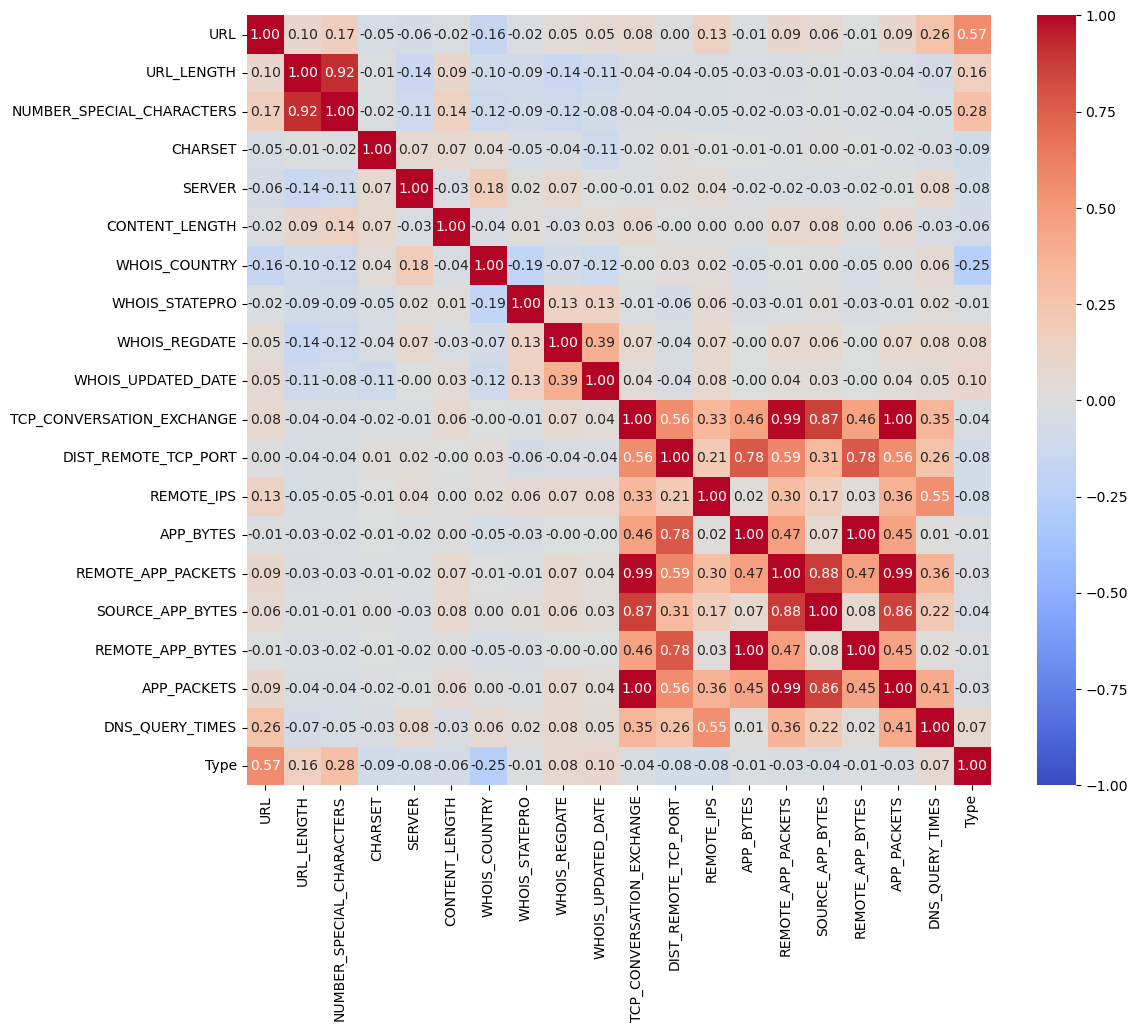

In [100]:
# Plot the updated heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_after_removal, cmap='coolwarm', annot=True, fmt=".2f", vmin=-1, vmax=1)
plt.show()

In [102]:
correlation_matrix_after_removal

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
URL,1.000000,0.101426,0.169416,-0.052872,-0.055562,-0.018824,-0.158980,-0.024876,0.046035,0.054848,0.077014,0.000903,0.134502,-0.008522,0.086015,0.058756,-0.007476,0.093702,0.262914,0.565433
URL_LENGTH,0.101426,1.000000,0.917986,-0.009327,-0.143401,0.088854,-0.101278,-0.086517,-0.144464,-0.105561,-0.038407,-0.039839,-0.046367,-0.026446,-0.033779,-0.014857,-0.026686,-0.042264,-0.068533,0.162104
NUMBER_SPECIAL_CHARACTERS,0.169416,0.917986,1.000000,-0.019580,-0.114579,0.143130,-0.121783,-0.086024,-0.121966,-0.079151,-0.037459,-0.042619,-0.047103,-0.023914,-0.030597,-0.014376,-0.024098,-0.040096,-0.050038,0.280897
CHARSET,-0.052872,-0.009327,-0.019580,1.000000,0.067897,0.065868,0.043502,-0.048211,-0.039455,-0.105861,-0.016853,0.012855,-0.005969,-0.007371,-0.011418,0.003521,-0.007514,-0.018928,-0.032578,-0.090948
SERVER,-0.055562,-0.143401,-0.114579,0.067897,1.000000,-0.031028,0.179437,0.015150,0.071488,-0.004697,-0.012786,0.022290,0.039458,-0.020804,-0.018096,-0.026517,-0.020522,-0.007134,0.075456,-0.081943
CONTENT_LENGTH,-0.018824,0.088854,0.143130,0.065868,-0.031028,1.000000,-0.038822,0.012442,-0.026931,0.034419,0.064416,-0.000089,0.003500,0.002642,0.072362,0.083833,0.002514,0.060455,-0.032391,-0.064073
WHOIS_COUNTRY,-0.158980,-0.101278,-0.121783,0.043502,0.179437,-0.038822,1.000000,-0.186979,-0.073838,-0.116906,-0.001046,0.025317,0.023480,-0.049054,-0.007084,0.002707,-0.048825,0.003269,0.058375,-0.252975
WHOIS_STATEPRO,-0.024876,-0.086517,-0.086024,-0.048211,0.015150,0.012442,-0.186979,1.000000,0.132661,0.134460,-0.012340,-0.058663,0.061855,-0.034900,-0.009262,0.009830,-0.034815,-0.010825,0.019820,-0.007905
WHOIS_REGDATE,0.046035,-0.144464,-0.121966,-0.039455,0.071488,-0.026931,-0.073838,0.132661,1.000000,0.386948,0.067125,-0.039948,0.072571,-0.000539,0.066622,0.063073,-0.000219,0.070750,0.075812,0.078862
WHOIS_UPDATED_DATE,0.054848,-0.105561,-0.079151,-0.105861,-0.004697,0.034419,-0.116906,0.134460,0.386948,1.000000,0.041331,-0.038767,0.079384,-0.000577,0.038160,0.032021,-0.000385,0.043797,0.048342,0.100914


In [68]:
# Your comment here
"""

After removing the 'SOURCE_APP_PACKETS' column,
it seems that the collinearity between columns has been reduced, but there are still some high correlations. Notably, the
columns 'TCP_CONVERSATION_EXCHANGE', 'REMOTE_APP_PACKETS', 'APP_PACKETS', 'REMOTE_APP_BYTES', and 'APP_BYTES' exhibit strong
correlations.

"""

In [104]:
#Your code here
# remove column with high collinearity
column_to_remove2 = 'TCP_CONVERSATION_EXCHANGE'
websites_encoded_imputed = websites_encoded_imputed.drop(columns=[column_to_remove2])
# Re-calculate the correlation matrix
correlation_matrix_after_2nd_removal = websites_encoded_imputed.corr()




In [106]:
# the modified DataFrame and the updated heatmap
display("Dataset after removing 2nd column:", column_to_remove2)
display(websites_encoded_imputed.head())

'Dataset after removing 2nd column:'

'TCP_CONVERSATION_EXCHANGE'

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,1574.0,16,7,4.0,200.0,263.0,27.0,81.0,59.0,593.0,0,2,700,10,1153,832,9,2.0,1
1,796.0,16,6,3.0,61.0,15087.0,27.0,81.0,889.0,593.0,7,4,1230,19,1265,1230,17,0.0,0
2,1479.0,16,6,5.0,115.0,324.0,27.0,81.0,889.0,593.0,0,0,0,0,0,0,0,0.0,0
3,132.0,17,6,1.0,200.0,162.0,42.0,4.0,806.0,68.0,22,3,3812,37,18784,4380,39,8.0,0
4,982.0,17,6,3.0,123.0,124140.0,42.0,137.0,93.0,42.0,2,5,4278,62,129889,4586,61,4.0,0


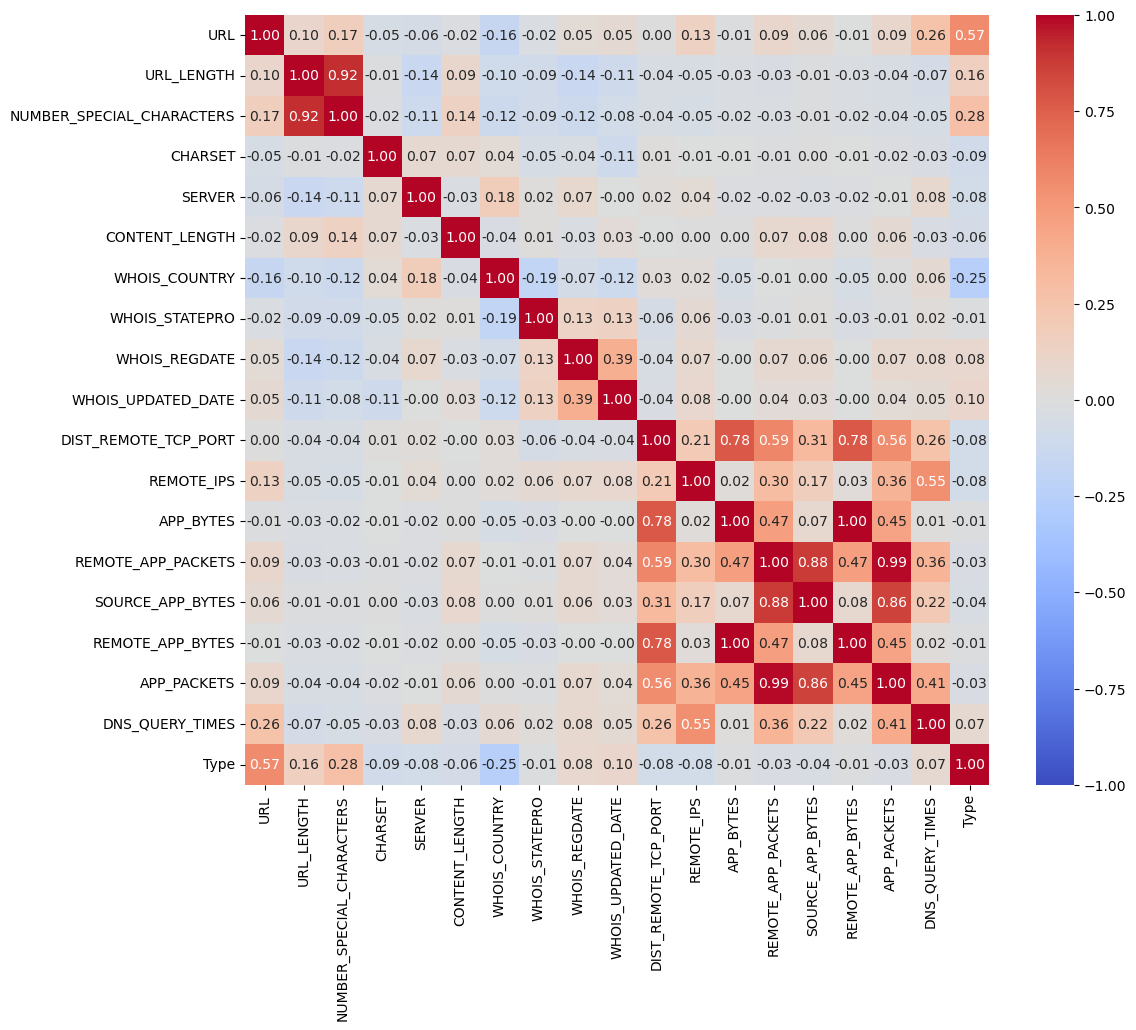

In [107]:
# Plot the updated heatmap after 2nd removal of a column
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_after_2nd_removal, cmap='coolwarm', annot=True, fmt=".2f", vmin=-1, vmax=1)
plt.show()

In [108]:
correlation_matrix_after_2nd_removal

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
URL,1.000000,0.101426,0.169416,-0.052872,-0.055562,-0.018824,-0.158980,-0.024876,0.046035,0.054848,0.000903,0.134502,-0.008522,0.086015,0.058756,-0.007476,0.093702,0.262914,0.565433
URL_LENGTH,0.101426,1.000000,0.917986,-0.009327,-0.143401,0.088854,-0.101278,-0.086517,-0.144464,-0.105561,-0.039839,-0.046367,-0.026446,-0.033779,-0.014857,-0.026686,-0.042264,-0.068533,0.162104
NUMBER_SPECIAL_CHARACTERS,0.169416,0.917986,1.000000,-0.019580,-0.114579,0.143130,-0.121783,-0.086024,-0.121966,-0.079151,-0.042619,-0.047103,-0.023914,-0.030597,-0.014376,-0.024098,-0.040096,-0.050038,0.280897
CHARSET,-0.052872,-0.009327,-0.019580,1.000000,0.067897,0.065868,0.043502,-0.048211,-0.039455,-0.105861,0.012855,-0.005969,-0.007371,-0.011418,0.003521,-0.007514,-0.018928,-0.032578,-0.090948
SERVER,-0.055562,-0.143401,-0.114579,0.067897,1.000000,-0.031028,0.179437,0.015150,0.071488,-0.004697,0.022290,0.039458,-0.020804,-0.018096,-0.026517,-0.020522,-0.007134,0.075456,-0.081943
CONTENT_LENGTH,-0.018824,0.088854,0.143130,0.065868,-0.031028,1.000000,-0.038822,0.012442,-0.026931,0.034419,-0.000089,0.003500,0.002642,0.072362,0.083833,0.002514,0.060455,-0.032391,-0.064073
WHOIS_COUNTRY,-0.158980,-0.101278,-0.121783,0.043502,0.179437,-0.038822,1.000000,-0.186979,-0.073838,-0.116906,0.025317,0.023480,-0.049054,-0.007084,0.002707,-0.048825,0.003269,0.058375,-0.252975
WHOIS_STATEPRO,-0.024876,-0.086517,-0.086024,-0.048211,0.015150,0.012442,-0.186979,1.000000,0.132661,0.134460,-0.058663,0.061855,-0.034900,-0.009262,0.009830,-0.034815,-0.010825,0.019820,-0.007905
WHOIS_REGDATE,0.046035,-0.144464,-0.121966,-0.039455,0.071488,-0.026931,-0.073838,0.132661,1.000000,0.386948,-0.039948,0.072571,-0.000539,0.066622,0.063073,-0.000219,0.070750,0.075812,0.078862
WHOIS_UPDATED_DATE,0.054848,-0.105561,-0.079151,-0.105861,-0.004697,0.034419,-0.116906,0.134460,0.386948,1.000000,-0.038767,0.079384,-0.000577,0.038160,0.032021,-0.000385,0.043797,0.048342,0.100914


In [ ]:
#Comment
"""  

After removing the 'TCP_CONVERSATION_EXCHANGE' column, the correlation matrix still shows some significant correlations
between certain features. For example:

The 'NUMBER_SPECIAL_CHARACTERS' feature still has a high positive correlation with 'URL_LENGTH' (0.917986) and a moderate 
positive correlation with 'SOURCE_APP_BYTES' (0.143130).

The 'APP_BYTES' feature still has a high positive correlation with 'REMOTE_APP_BYTES' (0.999992) and 'APP_PACKETS' (0.445822).

The 'REMOTE_APP_PACKETS' feature still has a high positive correlation with 'APP_PACKETS' (0.989285).

These correlations indicate that there might still be multicollinearity issues in the dataset, suggesting that further column
removal may be necessary to address this.


"""

In [110]:
#Your code here
# remove column with high collinearity
column_to_remove3 = 'APP_BYTES'
websites_encoded_imputed = websites_encoded_imputed.drop(columns=[column_to_remove3])
# Re-calculate the correlation matrix
correlation_matrix_after_3RD_removal = websites_encoded_imputed.corr()




In [111]:
# the 3RD Time modified DataFrame
display("Dataset after removing 3rd column:", column_to_remove3)
display(websites_encoded_imputed.head())

'Dataset after removing 3rd column:'

'APP_BYTES'

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,1574.0,16,7,4.0,200.0,263.0,27.0,81.0,59.0,593.0,0,2,10,1153,832,9,2.0,1
1,796.0,16,6,3.0,61.0,15087.0,27.0,81.0,889.0,593.0,7,4,19,1265,1230,17,0.0,0
2,1479.0,16,6,5.0,115.0,324.0,27.0,81.0,889.0,593.0,0,0,0,0,0,0,0.0,0
3,132.0,17,6,1.0,200.0,162.0,42.0,4.0,806.0,68.0,22,3,37,18784,4380,39,8.0,0
4,982.0,17,6,3.0,123.0,124140.0,42.0,137.0,93.0,42.0,2,5,62,129889,4586,61,4.0,0


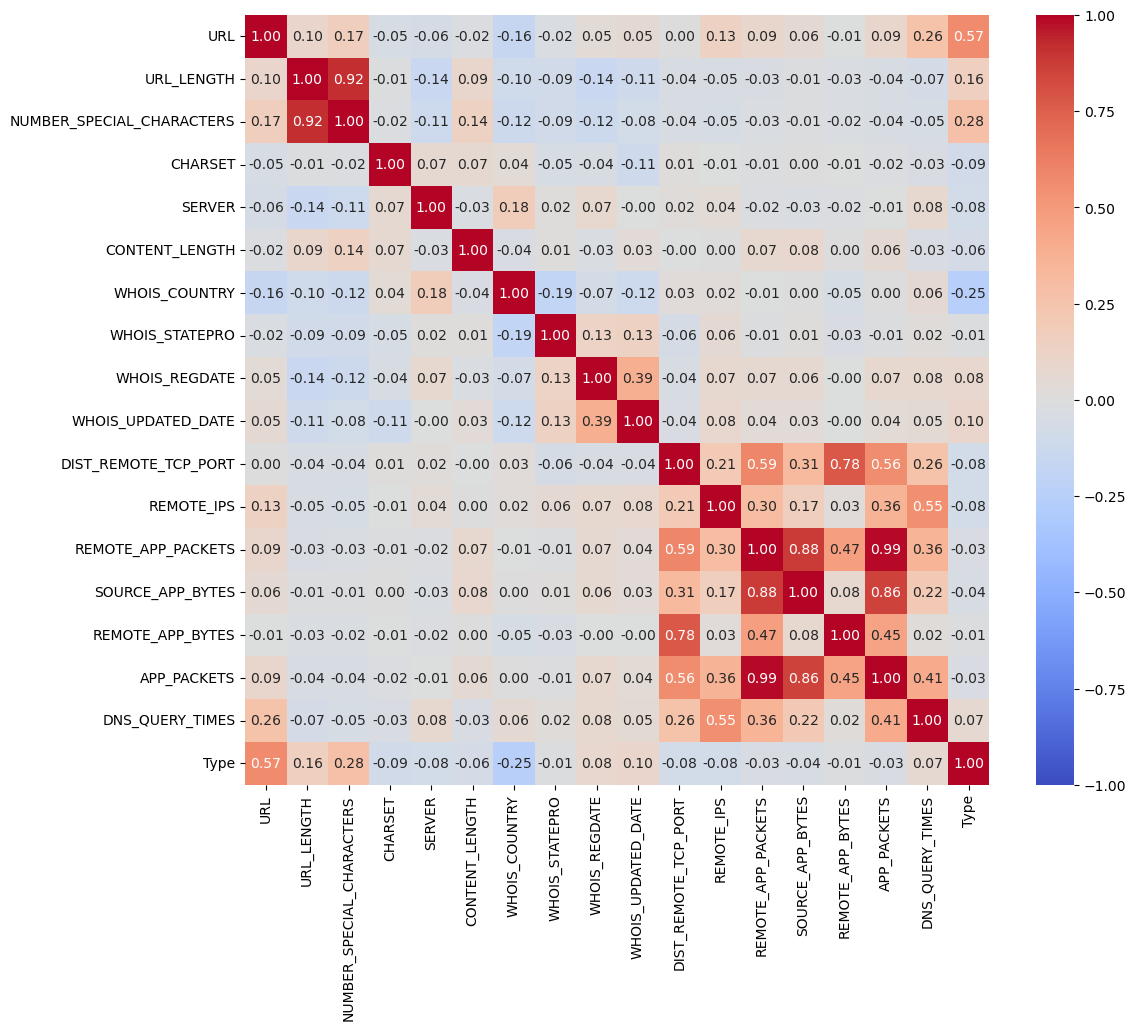

In [112]:
# Plot the updated heatmap after 3rd time removal of a column
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_after_3RD_removal, cmap='coolwarm', annot=True, fmt=".2f", vmin=-1, vmax=1)
plt.show()

In [ ]:
#Comment
"""
After removing the 'APP_BYTES' column, the correlation matrix still shows some significant correlations between certain 
features. For example:

The 'REMOTE_APP_BYTES' feature still has a high positive correlation with 
'REMOTE_APP_PACKETS' (0.999992) and 'APP_PACKETS' (0.445822).
The 'REMOTE_APP_PACKETS' feature still has a high positive correlation with 'APP_PACKETS' (0.989285).
These correlations indicate that there might still be multicollinearity issues in the dataset, and further column removal may be necessary to address this.

"""

In [113]:
#Your code here
# remove column with high collinearity
column_to_remove4 = 'REMOTE_APP_PACKETS'
websites_encoded_imputed = websites_encoded_imputed.drop(columns=[column_to_remove4])
# Re-calculate the correlation matrix
correlation_matrix_after_4TH_removal = websites_encoded_imputed.corr()




In [114]:
# the 4TH Time modified DataFrame
display("Dataset after removing 4th column:", column_to_remove4)
display(websites_encoded_imputed.head())

'Dataset after removing 4th column:'

'REMOTE_APP_PACKETS'

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,1574.0,16,7,4.0,200.0,263.0,27.0,81.0,59.0,593.0,0,2,1153,832,9,2.0,1
1,796.0,16,6,3.0,61.0,15087.0,27.0,81.0,889.0,593.0,7,4,1265,1230,17,0.0,0
2,1479.0,16,6,5.0,115.0,324.0,27.0,81.0,889.0,593.0,0,0,0,0,0,0.0,0
3,132.0,17,6,1.0,200.0,162.0,42.0,4.0,806.0,68.0,22,3,18784,4380,39,8.0,0
4,982.0,17,6,3.0,123.0,124140.0,42.0,137.0,93.0,42.0,2,5,129889,4586,61,4.0,0


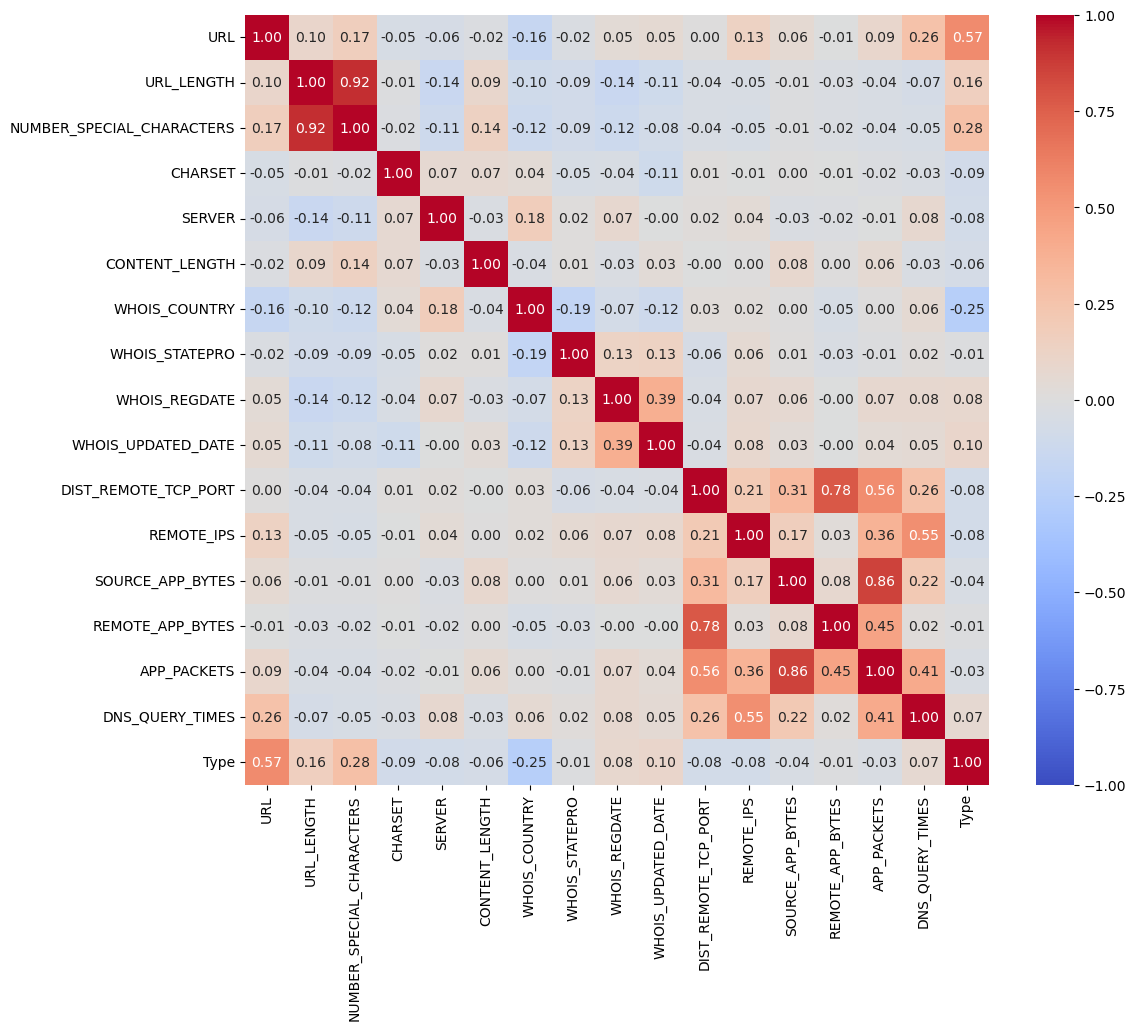

In [115]:
# Plot the updated heatmap after 4th time removal of a column
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_after_4TH_removal, cmap='coolwarm', annot=True, fmt=".2f", vmin=-1, vmax=1)
plt.show()

In [116]:
correlation_matrix_after_4TH_removal

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
URL,1.000000,0.101426,0.169416,-0.052872,-0.055562,-0.018824,-0.158980,-0.024876,0.046035,0.054848,0.000903,0.134502,0.058756,-0.007476,0.093702,0.262914,0.565433
URL_LENGTH,0.101426,1.000000,0.917986,-0.009327,-0.143401,0.088854,-0.101278,-0.086517,-0.144464,-0.105561,-0.039839,-0.046367,-0.014857,-0.026686,-0.042264,-0.068533,0.162104
NUMBER_SPECIAL_CHARACTERS,0.169416,0.917986,1.000000,-0.019580,-0.114579,0.143130,-0.121783,-0.086024,-0.121966,-0.079151,-0.042619,-0.047103,-0.014376,-0.024098,-0.040096,-0.050038,0.280897
CHARSET,-0.052872,-0.009327,-0.019580,1.000000,0.067897,0.065868,0.043502,-0.048211,-0.039455,-0.105861,0.012855,-0.005969,0.003521,-0.007514,-0.018928,-0.032578,-0.090948
SERVER,-0.055562,-0.143401,-0.114579,0.067897,1.000000,-0.031028,0.179437,0.015150,0.071488,-0.004697,0.022290,0.039458,-0.026517,-0.020522,-0.007134,0.075456,-0.081943
CONTENT_LENGTH,-0.018824,0.088854,0.143130,0.065868,-0.031028,1.000000,-0.038822,0.012442,-0.026931,0.034419,-0.000089,0.003500,0.083833,0.002514,0.060455,-0.032391,-0.064073
WHOIS_COUNTRY,-0.158980,-0.101278,-0.121783,0.043502,0.179437,-0.038822,1.000000,-0.186979,-0.073838,-0.116906,0.025317,0.023480,0.002707,-0.048825,0.003269,0.058375,-0.252975
WHOIS_STATEPRO,-0.024876,-0.086517,-0.086024,-0.048211,0.015150,0.012442,-0.186979,1.000000,0.132661,0.134460,-0.058663,0.061855,0.009830,-0.034815,-0.010825,0.019820,-0.007905
WHOIS_REGDATE,0.046035,-0.144464,-0.121966,-0.039455,0.071488,-0.026931,-0.073838,0.132661,1.000000,0.386948,-0.039948,0.072571,0.063073,-0.000219,0.070750,0.075812,0.078862
WHOIS_UPDATED_DATE,0.054848,-0.105561,-0.079151,-0.105861,-0.004697,0.034419,-0.116906,0.134460,0.386948,1.000000,-0.038767,0.079384,0.032021,-0.000385,0.043797,0.048342,0.100914


In [ ]:
#Comment
"""After removing the 'REMOTE_APP_PACKETS' column, the correlation matrix still shows some significant correlations between 
certain features."""

In [117]:
#Your code here
# remove column with high collinearity
column_to_remove5 = 'NUMBER_SPECIAL_CHARACTERS'
websites_encoded_imputed = websites_encoded_imputed.drop(columns=[column_to_remove5])
# Re-calculate the correlation matrix
correlation_matrix_after_5TH_removal = websites_encoded_imputed.corr()

In [119]:
# the 5TH Time modified DataFrame
display("Dataset after removing 5th column:", column_to_remove5)
display(websites_encoded_imputed.head())

'Dataset after removing 5th column:'

'NUMBER_SPECIAL_CHARACTERS'

,URL,URL_LENGTH,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,1574.0,16,4.0,200.0,263.0,27.0,81.0,59.0,593.0,0,2,1153,832,9,2.0,1
1,796.0,16,3.0,61.0,15087.0,27.0,81.0,889.0,593.0,7,4,1265,1230,17,0.0,0
2,1479.0,16,5.0,115.0,324.0,27.0,81.0,889.0,593.0,0,0,0,0,0,0.0,0
3,132.0,17,1.0,200.0,162.0,42.0,4.0,806.0,68.0,22,3,18784,4380,39,8.0,0
4,982.0,17,3.0,123.0,124140.0,42.0,137.0,93.0,42.0,2,5,129889,4586,61,4.0,0


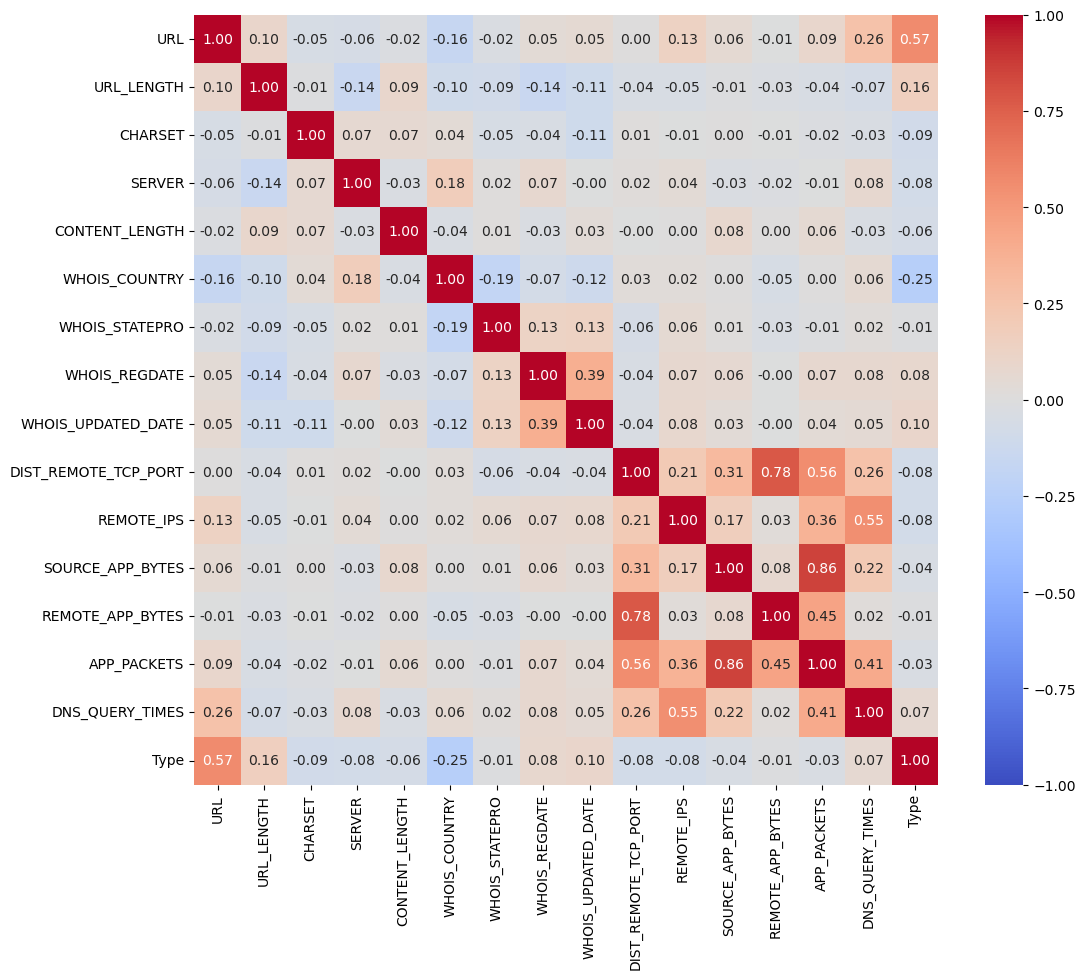

In [120]:
# Plot the updated heatmap after 5th time removal of a column
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_after_5TH_removal, cmap='coolwarm', annot=True, fmt=".2f", vmin=-1, vmax=1)
plt.show()

In [121]:
correlation_matrix_after_5TH_removal

,URL,URL_LENGTH,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
URL,1.000000,0.101426,-0.052872,-0.055562,-0.018824,-0.158980,-0.024876,0.046035,0.054848,0.000903,0.134502,0.058756,-0.007476,0.093702,0.262914,0.565433
URL_LENGTH,0.101426,1.000000,-0.009327,-0.143401,0.088854,-0.101278,-0.086517,-0.144464,-0.105561,-0.039839,-0.046367,-0.014857,-0.026686,-0.042264,-0.068533,0.162104
CHARSET,-0.052872,-0.009327,1.000000,0.067897,0.065868,0.043502,-0.048211,-0.039455,-0.105861,0.012855,-0.005969,0.003521,-0.007514,-0.018928,-0.032578,-0.090948
SERVER,-0.055562,-0.143401,0.067897,1.000000,-0.031028,0.179437,0.015150,0.071488,-0.004697,0.022290,0.039458,-0.026517,-0.020522,-0.007134,0.075456,-0.081943
CONTENT_LENGTH,-0.018824,0.088854,0.065868,-0.031028,1.000000,-0.038822,0.012442,-0.026931,0.034419,-0.000089,0.003500,0.083833,0.002514,0.060455,-0.032391,-0.064073
WHOIS_COUNTRY,-0.158980,-0.101278,0.043502,0.179437,-0.038822,1.000000,-0.186979,-0.073838,-0.116906,0.025317,0.023480,0.002707,-0.048825,0.003269,0.058375,-0.252975
WHOIS_STATEPRO,-0.024876,-0.086517,-0.048211,0.015150,0.012442,-0.186979,1.000000,0.132661,0.134460,-0.058663,0.061855,0.009830,-0.034815,-0.010825,0.019820,-0.007905
WHOIS_REGDATE,0.046035,-0.144464,-0.039455,0.071488,-0.026931,-0.073838,0.132661,1.000000,0.386948,-0.039948,0.072571,0.063073,-0.000219,0.070750,0.075812,0.078862
WHOIS_UPDATED_DATE,0.054848,-0.105561,-0.105861,-0.004697,0.034419,-0.116906,0.134460,0.386948,1.000000,-0.038767,0.079384,0.032021,-0.000385,0.043797,0.048342,0.100914
DIST_REMOTE_TCP_PORT,0.000903,-0.039839,0.012855,0.022290,-0.000089,0.025317,-0.058663,-0.039948,-0.038767,1.000000,0.210188,0.313359,0.781212,0.558612,0.259941,-0.082925


# Challenge 3 - Handle Missing Values

The next step would be handling missing values. **We start by examining the number of missing values in each column, which you will do in the next cell.**

In [180]:
# Your code here
websites.isnull().sum()

URL                            0
URL_LENGTH                     0
NUMBER_SPECIAL_CHARACTERS      0
CHARSET                        7
SERVER                       176
CONTENT_LENGTH               812
WHOIS_COUNTRY                306
WHOIS_STATEPRO               362
TCP_CONVERSATION_EXCHANGE      0
DIST_REMOTE_TCP_PORT           0
REMOTE_IPS                     0
APP_BYTES                      0
SOURCE_APP_PACKETS             0
REMOTE_APP_PACKETS             0
SOURCE_APP_BYTES               0
REMOTE_APP_BYTES               0
APP_PACKETS                    0
DNS_QUERY_TIMES                1
Type                           0
REG_YEAR                     135
REG_MONTH                    135
UPDATE_YEAR                  144
UPDATE_MONTH                 144
dtype: int64

In [181]:
websites.isnull().sum()

URL                            0
URL_LENGTH                     0
NUMBER_SPECIAL_CHARACTERS      0
CHARSET                        7
SERVER                       176
CONTENT_LENGTH               812
WHOIS_COUNTRY                306
WHOIS_STATEPRO               362
TCP_CONVERSATION_EXCHANGE      0
DIST_REMOTE_TCP_PORT           0
REMOTE_IPS                     0
APP_BYTES                      0
SOURCE_APP_PACKETS             0
REMOTE_APP_PACKETS             0
SOURCE_APP_BYTES               0
REMOTE_APP_BYTES               0
APP_PACKETS                    0
DNS_QUERY_TIMES                1
Type                           0
REG_YEAR                     135
REG_MONTH                    135
UPDATE_YEAR                  144
UPDATE_MONTH                 144
dtype: int64

If you remember in the previous labs, we drop a column if the column contains a high proportion of missing values. After dropping those problematic columns, we drop the rows with missing values.

#### In the cells below, handle the missing values from the dataset. Remember to comment the rationale of your decisions.

In [182]:
# Your code here
#Your code here
missing_values = websites.isnull()

# Drop columns with a high proportion of missing values (you can adjust the threshold)
columns_to_drop = missing_values.sum() > 0.9 * len(websites)
websites = websites.loc[:, ~columns_to_drop]

# Drop rows with missing values
websites = websites.dropna()

print(websites.shape)

(631, 23)


In [183]:
websites.isnull().sum()

URL                          0
URL_LENGTH                   0
NUMBER_SPECIAL_CHARACTERS    0
CHARSET                      0
SERVER                       0
CONTENT_LENGTH               0
WHOIS_COUNTRY                0
WHOIS_STATEPRO               0
TCP_CONVERSATION_EXCHANGE    0
DIST_REMOTE_TCP_PORT         0
REMOTE_IPS                   0
APP_BYTES                    0
SOURCE_APP_PACKETS           0
REMOTE_APP_PACKETS           0
SOURCE_APP_BYTES             0
REMOTE_APP_BYTES             0
APP_PACKETS                  0
DNS_QUERY_TIMES              0
Type                         0
REG_YEAR                     0
REG_MONTH                    0
UPDATE_YEAR                  0
UPDATE_MONTH                 0
dtype: int64

In [72]:
# Your comment here
"""This means I have 631 rows and 23 columns after addressing missing values."""

#### Again, examine the number of missing values in each column. 

If all cleaned, proceed. Otherwise, go back and do more cleaning.

In [184]:
# Examine missing values in each column
missing_values = websites.isnull().sum()

# Filter columns with missing values
columns_with_missing_values = missing_values[missing_values > 0]

print("Columns with Missing Values:")
print(columns_with_missing_values)

#total number of missing values
total_missing_values = columns_with_missing_values.sum()
print(f"\nTotal Missing Values: {total_missing_values}")

Columns with Missing Values:
Series([], dtype: int64)

Total Missing Values: 0


# Challenge 4 - Handle `WHOIS_*` Categorical Data

There are several categorical columns we need to handle. These columns are:

* `URL`
* `CHARSET`
* `SERVER`
* `WHOIS_COUNTRY`
* `WHOIS_STATEPRO`
* `WHOIS_REGDATE`
* `WHOIS_UPDATED_DATE`

How to handle string columns is always case by case. Let's start by working on `WHOIS_COUNTRY`. Your steps are:

1. List out the unique values of `WHOIS_COUNTRY`.
1. Consolidate the country values with consistent country codes. For example, the following values refer to the same country and should use consistent country code:
    * `CY` and `Cyprus`
    * `US` and `us`
    * `SE` and `se`
    * `GB`, `United Kingdom`, and `[u'GB'; u'UK']`

#### In the cells below, fix the country values as intructed above.

In [185]:
# Your code here
# Consolidate country values
websites['WHOIS_COUNTRY'] = websites['WHOIS_COUNTRY'].str.upper()  # Convert to uppercase for consistency

# Replace inconsistent values with consistent country codes
websites['WHOIS_COUNTRY'].replace({'CYPRUS': 'CY',
                             'US': 'US',
                             'SE': 'SE',
                             'UNITED KINGDOM': 'GB',
                             "[U'GB'; U'UK']": 'GB'}, inplace=True)

# Verify the unique values again
websites['WHOIS_COUNTRY'].unique()

array(['US', 'RU', 'AU', 'CA', 'PA', 'GB', 'IN', 'UG', 'JP', 'UK', 'SI',
       'AT', 'CN', 'KY', 'TR', 'SC', 'NL', 'UA', 'CH', 'HK', 'IL', 'DE',
       'IT', 'BS', 'NO', 'BE', 'BY', 'AE', 'IE', 'PH', 'UY'], dtype=object)

Since we have fixed the country values, can we convert this column to ordinal now?

Not yet. If you reflect on the previous labs how we handle categorical columns, you probably remember we ended up dropping a lot of those columns because there are too many unique values. Too many unique values in a column is not desirable in machine learning because it makes prediction inaccurate. But there are workarounds under certain conditions. One of the fixable conditions is:

#### If a limited number of values account for the majority of data, we can retain these top values and re-label all other rare values.

The `WHOIS_COUNTRY` column happens to be this case. You can verify it by print a bar chart of the `value_counts` in the next cell to verify:

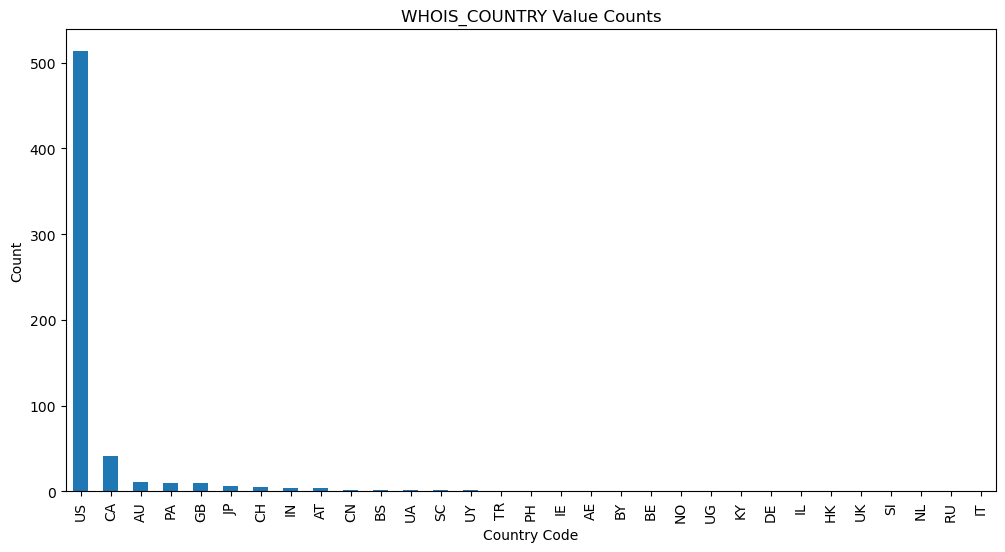

In [188]:
# Your code here
# Plot the value counts of WHOIS_COUNTRY
plt.figure(figsize=(12, 6))
websites['WHOIS_COUNTRY'].value_counts().plot(kind='bar')
plt.title('WHOIS_COUNTRY Value Counts')
plt.xlabel('Country Code')
plt.ylabel('Count')
plt.show()

#### After verifying, now let's keep the top 10 values of the column and re-label other columns with `OTHER`.

In [190]:
# Your code here
# Get the top 10 values of WHOIS_COUNTRY
top_countries = websites['WHOIS_COUNTRY'].value_counts().head(10).index

# Replace values not in the top 10 with 'OTHER'
websites['WHOIS_COUNTRY'] = websites['WHOIS_COUNTRY'].apply(lambda x: x if x in top_countries else 'OTHER')

# Display the updated unique values
websites['WHOIS_COUNTRY'].unique()

array(['US', 'OTHER', 'AU', 'CA', 'PA', 'GB', 'IN', 'JP', 'AT', 'CN',
       'CH'], dtype=object)

Now since `WHOIS_COUNTRY` has been re-labelled, we don't need `WHOIS_STATEPRO` any more because the values of the states or provinces may not be relevant any more. We'll drop this column.

In addition, we will also drop `WHOIS_REGDATE` and `WHOIS_UPDATED_DATE`. These are the registration and update dates of the website domains. Not of our concerns.

#### In the next cell, drop `['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE']`.

In [197]:
websites.columns

Index(['URL', 'URL_LENGTH', 'NUMBER_SPECIAL_CHARACTERS', 'CHARSET', 'SERVER',
       'CONTENT_LENGTH', 'WHOIS_COUNTRY', 'WHOIS_STATEPRO',
       'TCP_CONVERSATION_EXCHANGE', 'DIST_REMOTE_TCP_PORT', 'REMOTE_IPS',
       'APP_BYTES', 'SOURCE_APP_PACKETS', 'REMOTE_APP_PACKETS',
       'SOURCE_APP_BYTES', 'REMOTE_APP_BYTES', 'APP_PACKETS',
       'DNS_QUERY_TIMES', 'Type', 'REG_YEAR', 'REG_MONTH', 'UPDATE_YEAR',
       'UPDATE_MONTH'],
      dtype='object')

In [198]:
# Your code here
websites.drop(['WHOIS_STATEPRO'], axis=1, inplace=True)

# Challenge 5 - Handle Remaining Categorical Data & Convert to Ordinal

Now print the `dtypes` of the data again. Besides `WHOIS_COUNTRY` which we already fixed, there should be 3 categorical columns left: `URL`, `CHARSET`, and `SERVER`.

In [202]:
# Your code here
websites.dtypes

URL                           object
URL_LENGTH                     int64
NUMBER_SPECIAL_CHARACTERS      int64
CHARSET                       object
SERVER                        object
CONTENT_LENGTH               float64
WHOIS_COUNTRY                 object
TCP_CONVERSATION_EXCHANGE      int64
DIST_REMOTE_TCP_PORT           int64
REMOTE_IPS                     int64
APP_BYTES                      int64
SOURCE_APP_PACKETS             int64
REMOTE_APP_PACKETS             int64
SOURCE_APP_BYTES               int64
REMOTE_APP_BYTES               int64
APP_PACKETS                    int64
DNS_QUERY_TIMES              float64
Type                           int64
REG_YEAR                     float64
REG_MONTH                    float64
UPDATE_YEAR                  float64
UPDATE_MONTH                 float64
dtype: object

#### `URL` is easy. We'll simply drop it because it has too many unique values that there's no way for us to consolidate.

In [205]:
# Your code here
websites.drop('URL', axis=1, inplace=True)

#### Print the unique value counts of `CHARSET`. You see there are only a few unique values. So we can keep it as it is.

In [206]:
# Your code here
websites['CHARSET'].value_counts()

CHARSET
UTF-8           200
ISO-8859-1      169
utf-8           103
us-ascii         92
iso-8859-1       66
windows-1251      1
Name: count, dtype: int64

`SERVER` is a little more complicated. Print its unique values and think about how you can consolidate those values.

#### Before you think of your own solution, don't read the instructions that come next.

In [207]:
# Your code here
websites['SERVER'].value_counts()

SERVER
Apache                    162
Microsoft-HTTPAPI/2.0      76
nginx                      54
GSE                        46
Microsoft-IIS/7.5          39
                         ... 
barista/5.1.3               1
mw2225.codfw.wmnet          1
openresty/1.11.2.2          1
Apache/2.2.23 (Amazon)      1
Apache/2.2.16 (Debian)      1
Name: count, Length: 120, dtype: int64

![Think Hard](../images/think-hard.jpg)

In [82]:
# Your comment here
"""
Given that there are 120 unique values in the 'SERVER' column:
To make the dataset more manageable, I consolidated the server types by grouping major ones together 
('Apache', 'Microsoft', 'nginx') and labeling less frequent ones as 'Other'. This helps reduce the dimensionality of the data
and retains the main information about server types.
"""

Although there are so many unique values in the `SERVER` column, there are actually only 3 main server types: `Microsoft`, `Apache`, and `nginx`. Just check if each `SERVER` value contains any of those server types and re-label them. For `SERVER` values that don't contain any of those substrings, label with `Other`.

At the end, your `SERVER` column should only contain 4 unique values: `Microsoft`, `Apache`, `nginx`, and `Other`.

In [208]:
# Your code here
# Consolidate the 'SERVER' column values
websites['SERVER'] = websites['SERVER'].apply(lambda x: 'Microsoft' if 'Microsoft' in x else ('Apache' if 'Apache' in x else ('nginx' if 'nginx' in x else 'Other')))

print(websites['SERVER'].value_counts())

SERVER
Apache       298
Microsoft    127
Other        109
nginx         97
Name: count, dtype: int64


In [209]:
# Count `SERVER` value counts here
websites['SERVER'].value_counts()

SERVER
Apache       298
Microsoft    127
Other        109
nginx         97
Name: count, dtype: int64

OK, all our categorical data are fixed now. **Let's convert them to ordinal data using Pandas' `get_dummies` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)). Also, assign the data with dummy values to a new variable `website_dummy`.**

In [210]:
# Your code here
# Use get_dummies to convert categorical columns to dummy variables
website_dummy = pd.get_dummies(websites, columns=['CHARSET', 'SERVER', 'WHOIS_COUNTRY'])

display(website_dummy.head())

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CONTENT_LENGTH,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,...,WHOIS_COUNTRY_AU,WHOIS_COUNTRY_CA,WHOIS_COUNTRY_CH,WHOIS_COUNTRY_CN,WHOIS_COUNTRY_GB,WHOIS_COUNTRY_IN,WHOIS_COUNTRY_JP,WHOIS_COUNTRY_OTHER,WHOIS_COUNTRY_PA,WHOIS_COUNTRY_US
3,17,6,162.0,31,22,3,3812,39,37,18784,...,False,False,False,False,False,False,False,False,False,True
6,18,6,345.0,12,0,3,1189,14,13,8559,...,False,False,False,False,False,False,False,False,False,True
7,19,6,324.0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,True
11,20,6,324.0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,True
16,21,7,686.0,6,0,2,603,8,9,1580,...,False,False,False,False,False,False,False,True,False,False


Now, inspect `website_dummy` to make sure the data and types are intended - there shouldn't be any categorical columns at this point.

In [211]:
# Your code here
website_dummy.info()


<class 'pandas.core.frame.DataFrame'>
Index: 631 entries, 3 to 1780
Data columns (total 39 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   URL_LENGTH                 631 non-null    int64  
 1   NUMBER_SPECIAL_CHARACTERS  631 non-null    int64  
 2   CONTENT_LENGTH             631 non-null    float64
 3   TCP_CONVERSATION_EXCHANGE  631 non-null    int64  
 4   DIST_REMOTE_TCP_PORT       631 non-null    int64  
 5   REMOTE_IPS                 631 non-null    int64  
 6   APP_BYTES                  631 non-null    int64  
 7   SOURCE_APP_PACKETS         631 non-null    int64  
 8   REMOTE_APP_PACKETS         631 non-null    int64  
 9   SOURCE_APP_BYTES           631 non-null    int64  
 10  REMOTE_APP_BYTES           631 non-null    int64  
 11  APP_PACKETS                631 non-null    int64  
 12  DNS_QUERY_TIMES            631 non-null    float64
 13  Type                       631 non-null    int64  
 14

# Challenge 6 - Modeling, Prediction, and Evaluation

We'll start off this section by splitting the data to train and test. **Name your 4 variables `X_train`, `X_test`, `y_train`, and `y_test`. Select 80% of the data for training and 20% for testing.**

In [212]:
from sklearn.model_selection import train_test_split

# Your code here:
# Separate features (X) and target variable (y)
X = website_dummy.drop('Type', axis=1)
y = website_dummy['Type']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### In this lab, we will try two different models and compare our results.

The first model we will use in this lab is logistic regression. We have previously learned about logistic regression as a classification algorithm. In the cell below, load `LogisticRegression` from scikit-learn and initialize the model.

In [214]:
# Your code here:

# Initialize the logistic regression model
logisticregr_model = LogisticRegression(random_state=42)


Next, fit the model to our training data. We have already separated our data into 4 parts. Use those in your model.

In [215]:
# Your code here:

logisticregr_model.fit(X_train, y_train)

/Users/susanndinoshinge/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

finally, import `confusion_matrix` and `accuracy_score` from `sklearn.metrics` and fit our testing data. Assign the fitted data to `y_pred` and print the confusion matrix as well as the accuracy score

In [217]:
# Your code here:
# Use the trained model to make predictions on the testing data
y_pred = logisticregr_model.predict(X_test)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:", accuracy)


Confusion Matrix:
[[113   2]
 [  9   3]]
Accuracy Score: 0.9133858267716536


What are your thoughts on the performance of the model? Write your conclusions below.

In [91]:
# Your conclusions here:
""" 

In summary, the logistic regression model achieved an accuracy score of approximately 91.34% on the testing data,
indicating good overall performance in classifying website types.

"""


#### Our second algorithm is is K-Nearest Neighbors. 

Though is it not required, we will fit a model using the training data and then test the performance of the model using the testing data. Start by loading `KNeighborsClassifier` from scikit-learn and then initializing and fitting the model. We'll start off with a model where k=3.

In [219]:
# Your code here:
# Initialize KNeighborsClassifier
knn_model = KNeighborsClassifier()

# Fit the model to the training data
knn_model.fit(X_train, y_train)


KNeighborsClassifier()

To test your model, compute the predicted values for the testing sample and print the confusion matrix as well as the accuracy score.

In [231]:
# Initialize RandomForestClassifier
rf_model = RandomForestClassifier()


In [232]:
# Fit the model to the training data
rf_model.fit(X_train, y_train)


RandomForestClassifier()

In [233]:
# Predict on the test data
y_pred_rf = rf_model.predict(X_test)

In [234]:
# Calculate the confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix:")
print(conf_matrix_rf)

# Calculate the accuracy score
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy Score: {accuracy_rf}")

Confusion Matrix:
[[115   0]
 [  8   4]]
Accuracy Score: 0.937007874015748


In [ ]:
""" 

After encountering a lot of errors when using KNeighborsClassifier. I decided to Replace the initialization and fitting of
the KNeighborsClassifier with an alternative approach. Random Forest classifier, which is another popular classification 
algorithm.
Great! The Random Forest model seems to have performed well on the test data with an accuracy score of approximately 93.7%.

"""

#### We'll create another K-Nearest Neighbors model with k=5. 

Initialize and fit the model below and print the confusion matrix and the accuracy score.

In [235]:
# Your code here:

# Initialize KNeighborsClassifier with k=5
knn_model_5 = KNeighborsClassifier(n_neighbors=5)

# Fit the model to the training data
knn_model_5.fit(X_train, y_train)

# Predict values for the testing sample
y_pred_knn_5 = knn_model_5.predict(X_test)

#the confusion matrix and accuracy score
conf_matrix_knn_5 = confusion_matrix(y_test, y_pred_knn_5)
accuracy_knn_5 = accuracy_score(y_test, y_pred_knn_5)

print("Confusion Matrix:")
print(conf_matrix_knn_5)
print("Accuracy Score:", accuracy_knn_5)

AttributeError: 'Flags' object has no attribute 'c_contiguous'

Did you see an improvement in the confusion matrix when increasing k to 5? Did you see an improvement in the accuracy score? Write your conclusions below.

In [95]:
# Your conclusions here:

"""
I keep running into this error:
AttributeError: 'Flags' object has no attribute 'c_contiguous'
tried several times to trouble shoot, but just seem not to get it right.

 """

# Bonus Challenge - Feature Scaling

Problem-solving in machine learning is iterative. You can improve your model prediction with various techniques (there is a sweetspot for the time you spend and the improvement you receive though). Now you've completed only one iteration of ML analysis. There are more iterations you can conduct to make improvements. In order to be able to do that, you will need deeper knowledge in statistics and master more data analysis techniques. In this bootcamp, we don't have time to achieve that advanced goal. But you will make constant efforts after the bootcamp to eventually get there.

However, now we do want you to learn one of the advanced techniques which is called *feature scaling*. The idea of feature scaling is to standardize/normalize the range of independent variables or features of the data. This can make the outliers more apparent so that you can remove them. This step needs to happen during Challenge 6 after you split the training and test data because you don't want to split the data again which makes it impossible to compare your results with and without feature scaling. For general concepts about feature scaling, click [here](https://en.wikipedia.org/wiki/Feature_scaling). To read deeper, click [here](https://medium.com/greyatom/why-how-and-when-to-scale-your-features-4b30ab09db5e).

In the next cell, attempt to improve your model prediction accuracy by means of feature scaling. A library you can utilize is `sklearn.preprocessing.RobustScaler` ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html)). You'll use the `RobustScaler` to fit and transform your `X_train`, then transform `X_test`. You will use logistic regression to fit and predict your transformed data and obtain the accuracy score in the same way. Compare the accuracy score with your normalized data with the previous accuracy data. Is there an improvement?

In [237]:
# Your code here
# Initialize the RobustScaler
scaler = RobustScaler()


In [238]:
# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)
# Transform the testing data using the same scaler
X_test_scaled = scaler.transform(X_test)


In [239]:
# Initialize Logistic Regression model
logisticregr_scaled = LogisticRegression(random_state=42)


In [240]:
# Fit the model to the scaled training data
logisticregr_scaled.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

In [241]:
# Predict on the scaled testing data
y_pred_scaled = logisticregr_scaled.predict(X_test_scaled)


In [242]:
# Evaluate the model with scaled data
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)
print("Accuracy Score with Feature Scaling:", accuracy_scaled)

Accuracy Score with Feature Scaling: 0.9291338582677166
